In [28]:
import pandas as pd 
import numpy as np
import os
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [16]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Exploratory Data Analysis (EDA)

In [17]:
#checking with information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [18]:
#checking for any null values 
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [19]:
#checking shape of our data
data.shape

(3999, 12)

In [20]:
# Renaming of one column name
data2 = data.rename({"Award?":"Award"},axis = 1)
data2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Visualization

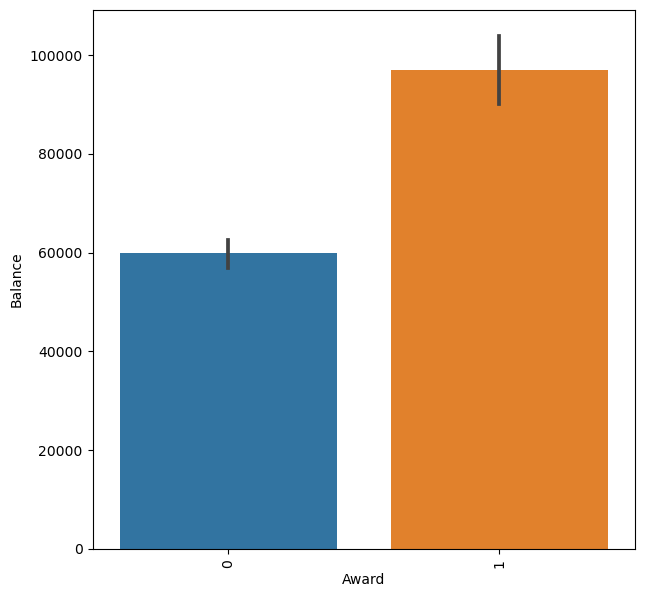

In [21]:
# Plotting with balance and award 
plt.figure(figsize=(7,7))
Balance = data2[['Award','Balance']].sort_values ('Balance',ascending = False)
ax =  sns.barplot(x = 'Award',y = 'Balance',data = Balance)
ax.set(xlabel = 'Award',ylabel = 'Balance')
plt.xticks(rotation = 90)
plt.show()



In [22]:
# Checking for correlation
corr_matrix =  data2.corr()
corr_matrix["Balance"].sort_values(ascending = False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID#                 -0.243737
Name: Balance, dtype: float64

<AxesSubplot:>

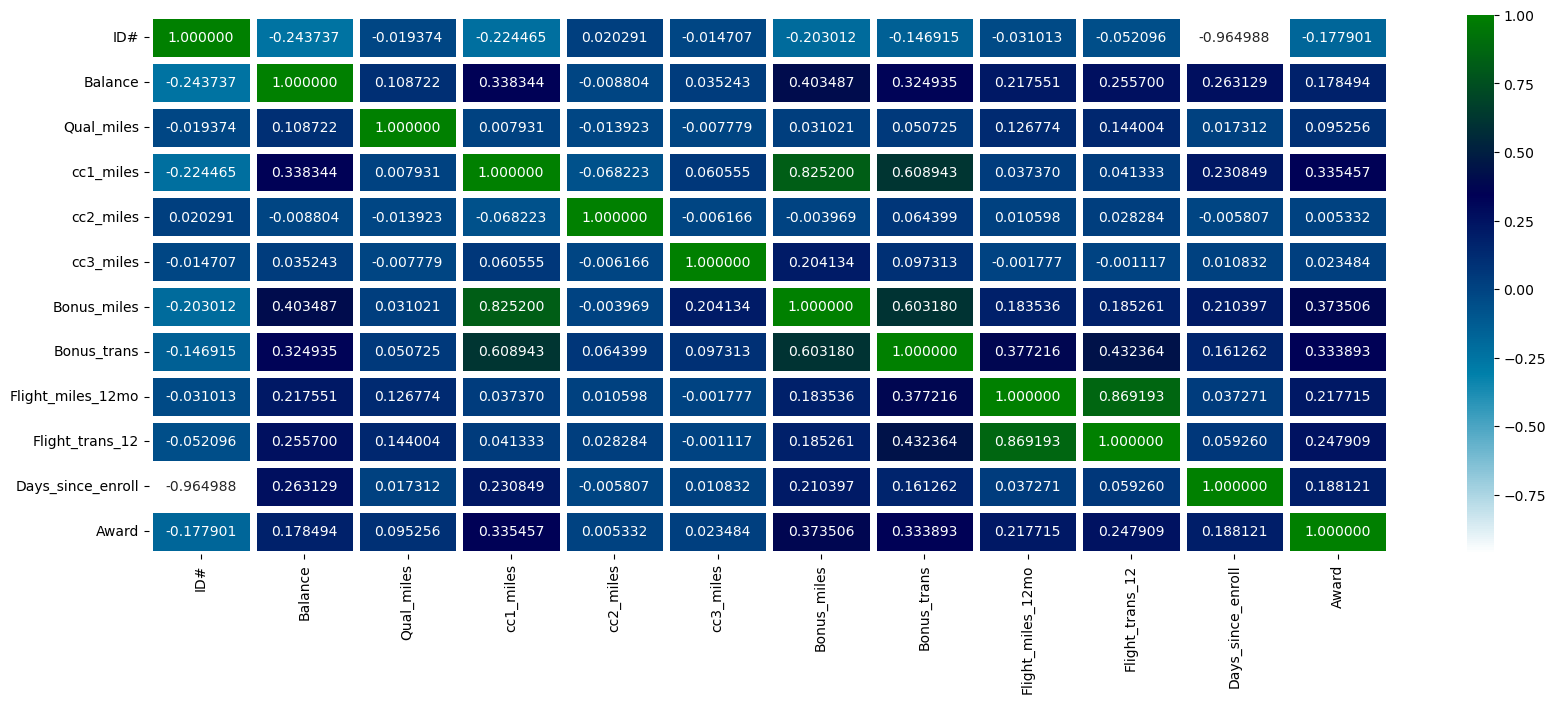

In [24]:
# Correlation heatmap 
f,ax = plt.subplots(figsize = (20,7))
sn.heatmap(data2.corr(),annot = True, linewidths =5 ,fmt ='1f',ax = ax,cmap="ocean_r")

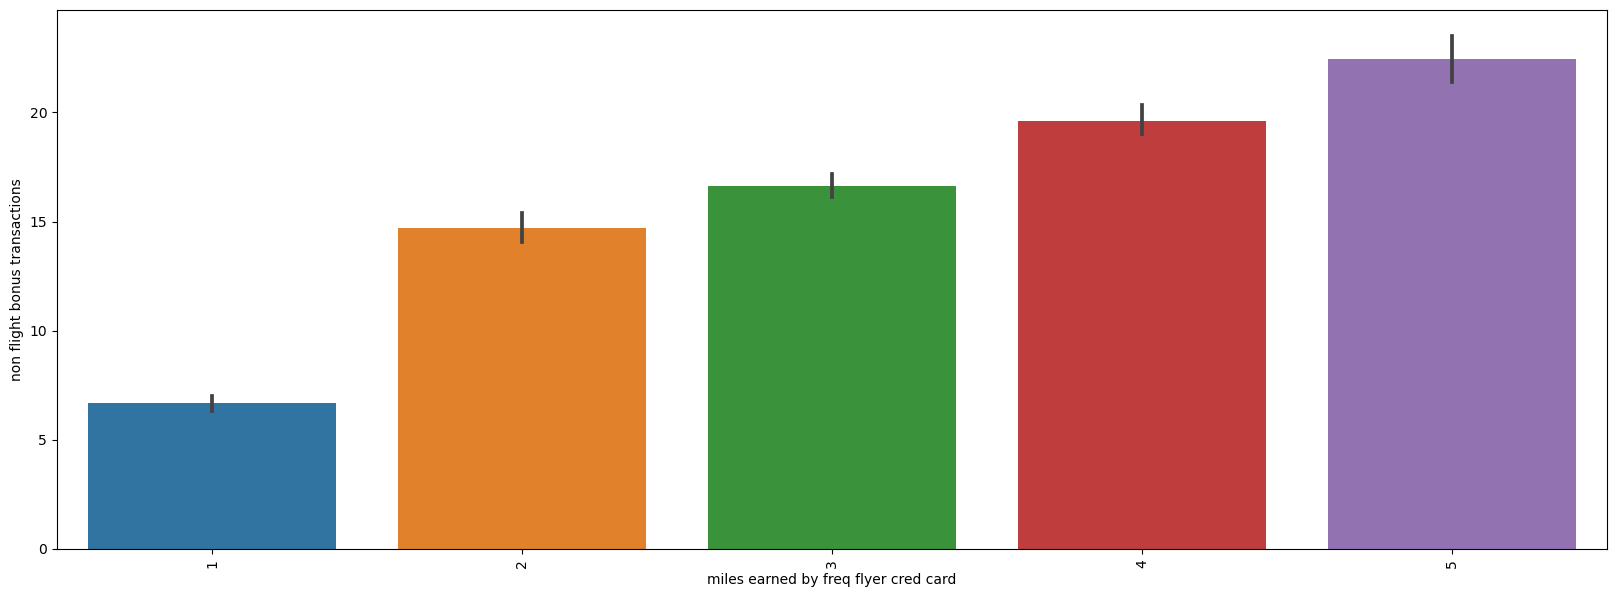

In [25]:
# Plotting for frequent flying bonuses vs non flight bonus transactions

plt.figure(figsize=(20,7))
sorted_data = data2[['cc1_miles','Bonus_trans']].sort_values ('Bonus_trans',ascending = False)
ax =  sns.barplot(x = 'cc1_miles',y = 'Bonus_trans',data = sorted_data)
ax.set(xlabel = 'miles earned by freq flyer cred card',ylabel = 'non flight bonus transactions')
plt.xticks(rotation = 90)
plt.show()



In [26]:
# Bonus transactions are more used by those people who travel gradually

ID#


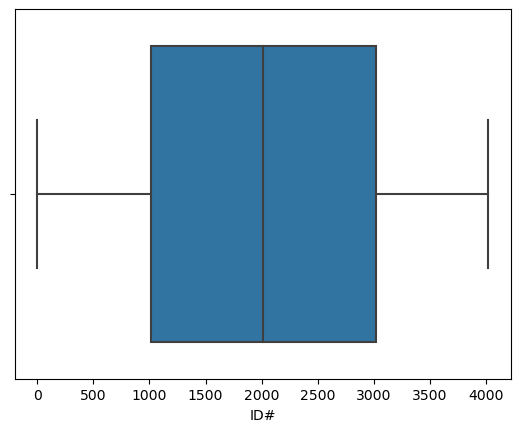

Balance


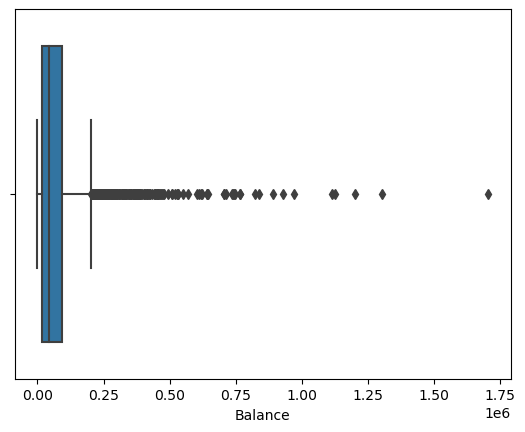

Qual_miles


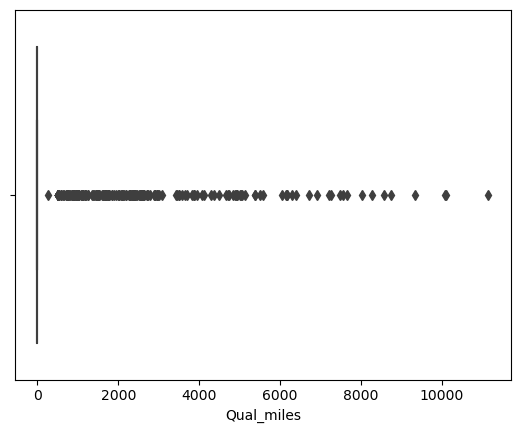

cc1_miles


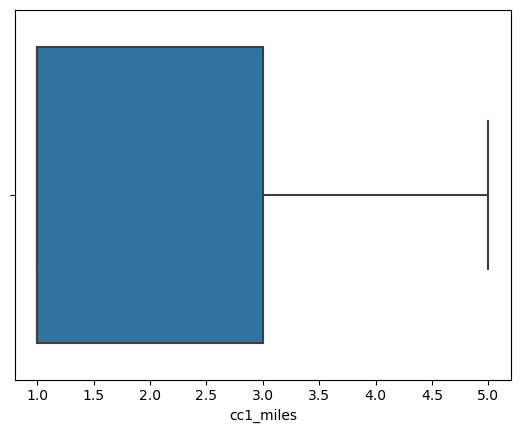

cc2_miles


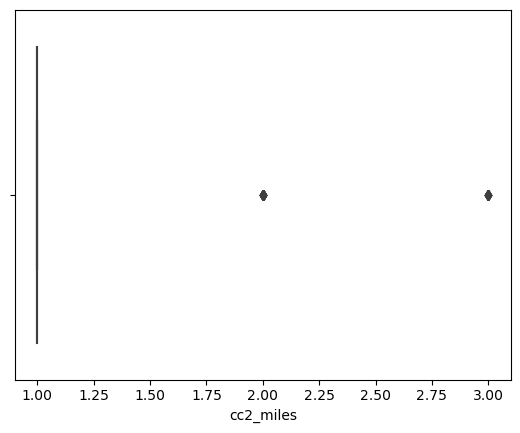

cc3_miles


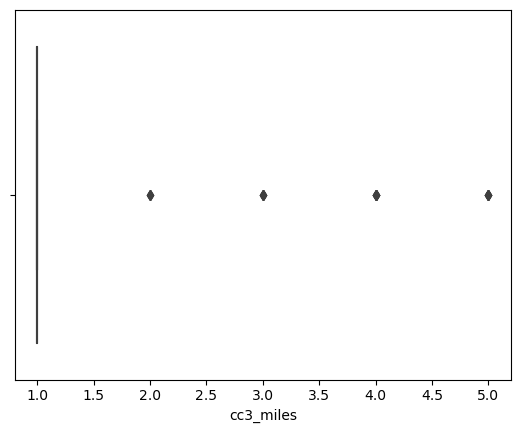

Bonus_miles


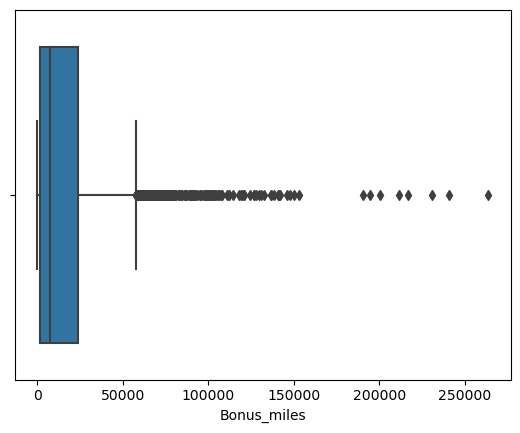

Bonus_trans


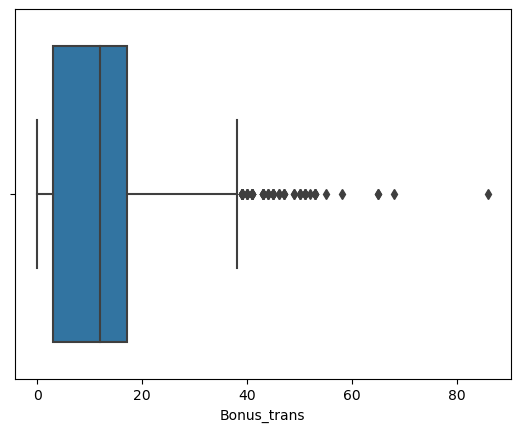

Flight_miles_12mo


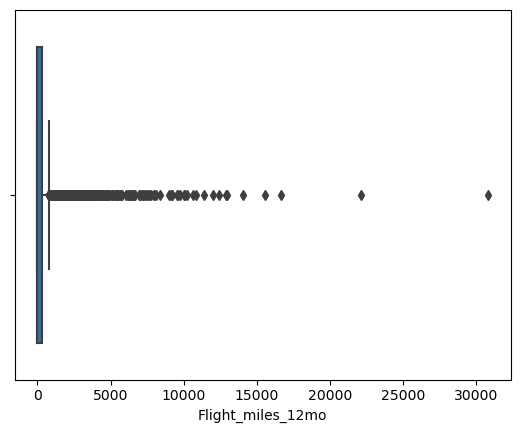

Flight_trans_12


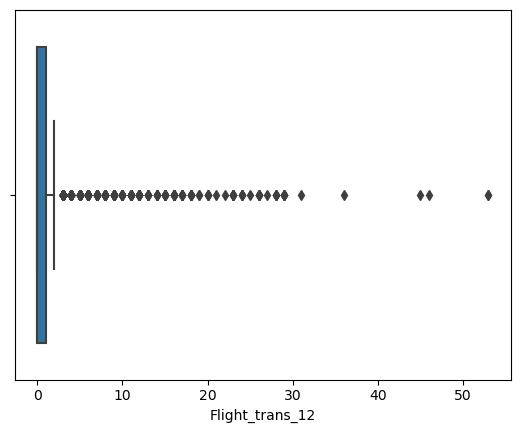

Days_since_enroll


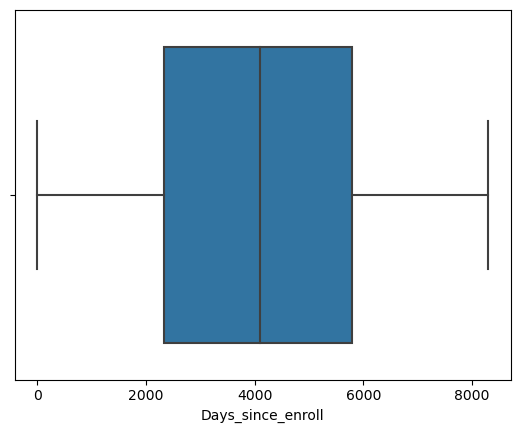

Award


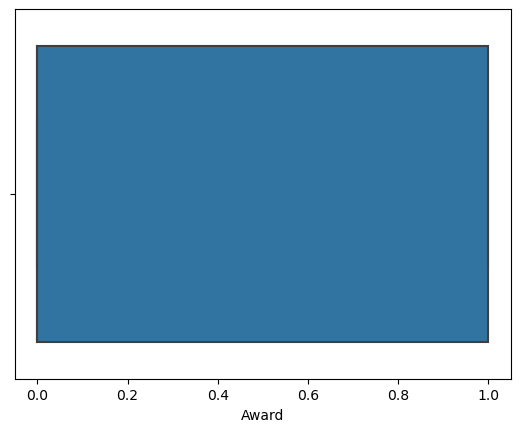

In [29]:
# Checking for outlier using boxplot 
for n in data2.columns:
    print(n)
    sns.boxplot(data2[n])
    plt.show()

# Outlier Analysis

<AxesSubplot:>

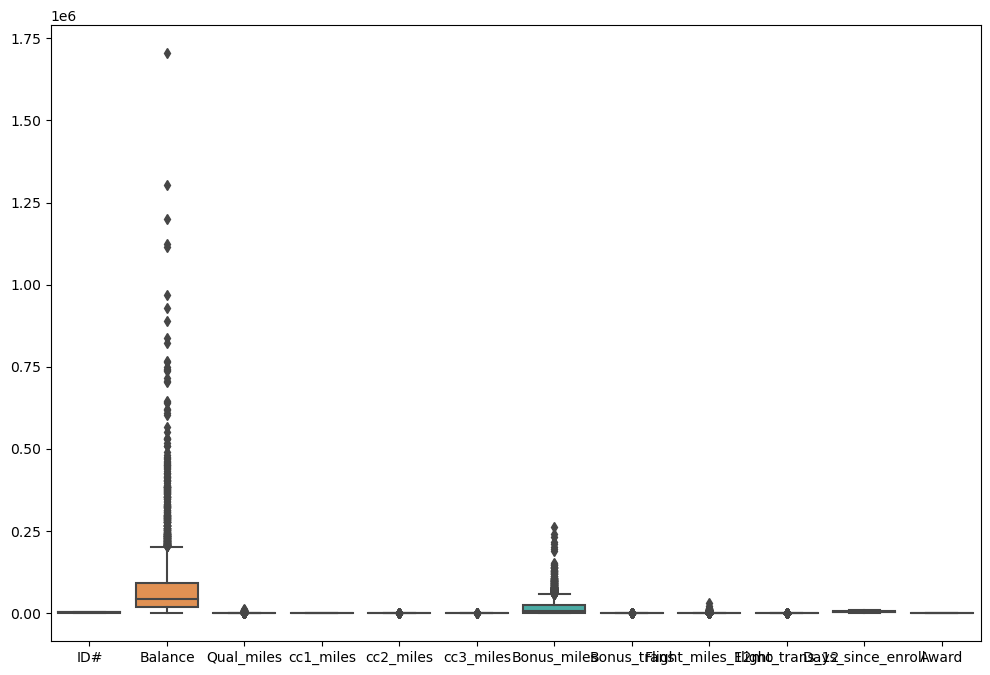

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(data= data2)

In [31]:
# Outliers in balance , eliminating outliers from balance 
q1 = data2['Balance'].quantile(0.25)
q3 = data2['Balance'].quantile(0.75)
iqr = q3-q1
uq1 = q3 + (1.5*iqr)
lq1 = q1 -(1.5*iqr)
data3 = data2[(data2['Balance']>lq1)&(data2['Balance']<uq1)]
data3.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


<AxesSubplot:>

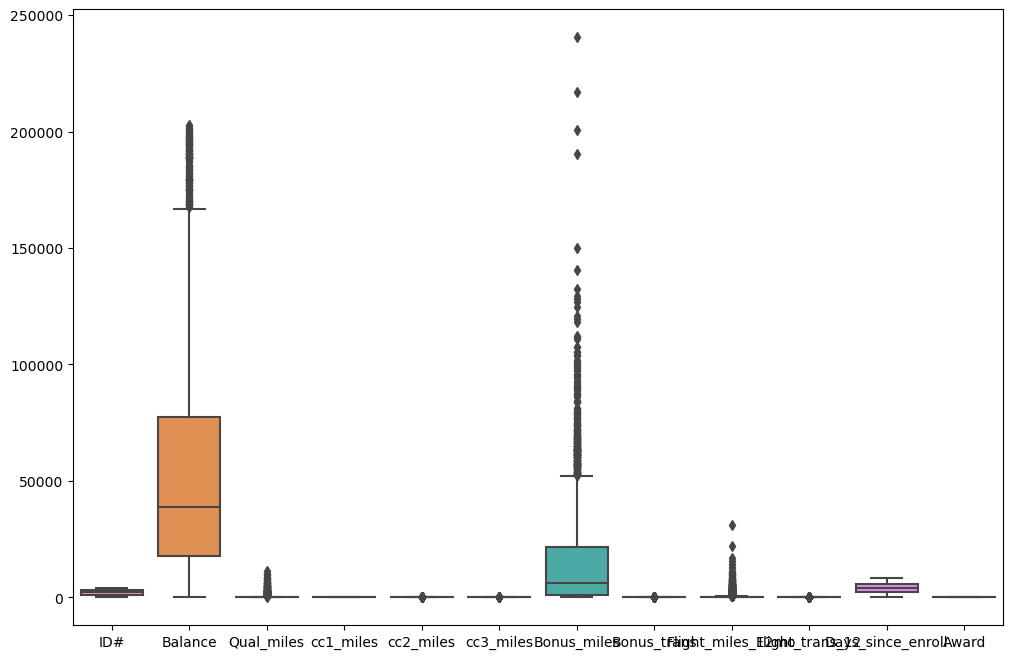

In [32]:
# Checking for outliers using visualization
plt.figure(figsize=(12,8))
sns.boxplot(data= data3)

In [33]:
# Checking the shape of our new dataframe
data3.shape

(3733, 12)

In [34]:
# Removing outliers from Bonus miles 
# outliers in bonus miles , eliminating outliers from bonus miles
q1 = data3['Bonus_miles'].quantile(0.25)
q3 = data3['Bonus_miles'].quantile(0.75)
iqr = q3-q1
uq1 = q3 + (1.5*iqr)
lq1 = q1 -(1.5*iqr)
data4 = data3[(data3['Bonus_miles']>lq1)&(data3['Bonus_miles']<uq1)]

data4.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


<AxesSubplot:>

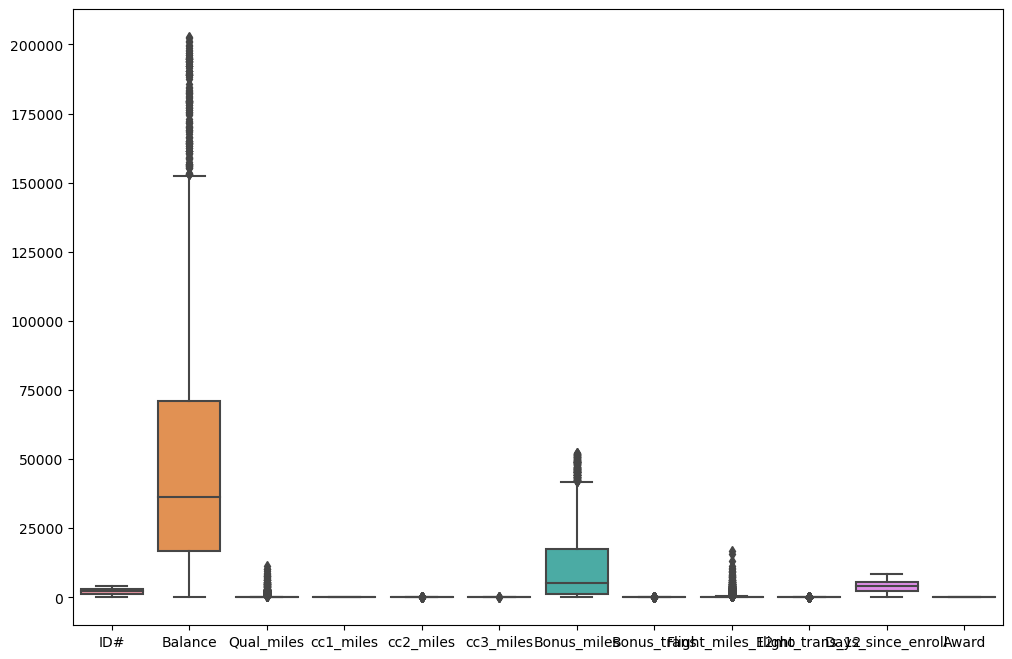

In [35]:
# Checking for outliers using visualization
plt.figure(figsize=(12,8))
sns.boxplot(data= data4)

In [36]:

# Removing outlier from flight miles 
# Outliers in flight miles , eliminating outliers 
q1 = data4['Flight_miles_12mo'].quantile(0.25)
q3 = data4['Flight_miles_12mo'].quantile(0.75)
iqr = q3-q1
uq1 = q3 + (1.5*iqr)
lq1 = q1 -(1.5*iqr)
data5 = data4[(data4['Flight_miles_12mo']>lq1)&(data4['Flight_miles_12mo']<uq1)]
data5.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0


<AxesSubplot:>

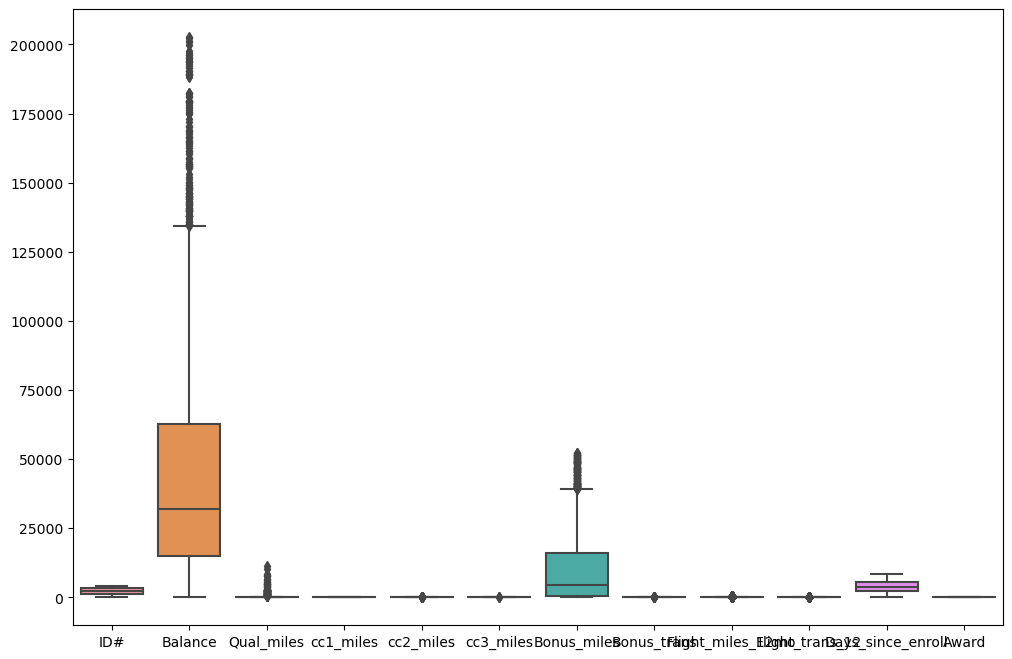

In [37]:
# Checking for outliers using visualization 
plt.figure(figsize=(12,8))
sns.boxplot(data= data5)

In [38]:

# Removing outlier from Qual miles 
# Outliers in Qual miles , eliminating outliers 
q1 = data5['Qual_miles'].quantile(0.25)
q3 = data5['Qual_miles'].quantile(0.75)
iqr = q3-q1
uq1 = q3 + (1.5*iqr)
lq1 = q1 -(1.5*iqr)
data6 = data5[(data5['Qual_miles']>lq1)&(data5['Qual_miles']<uq1)]
data6.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award


<AxesSubplot:>

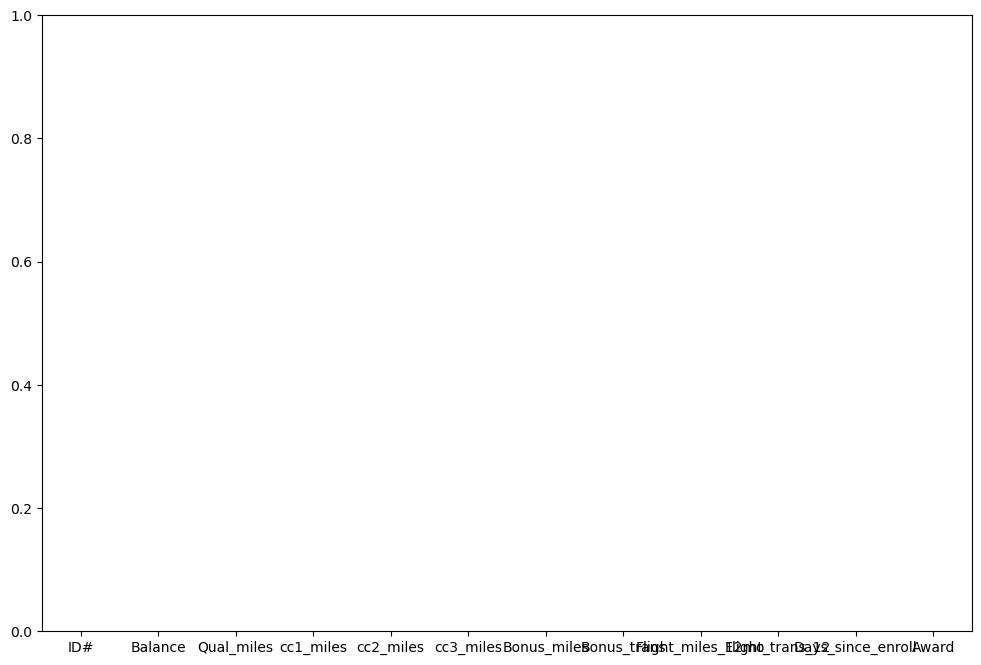

In [39]:
# Checking for outliers using visualization
plt.figure(figsize=(12,8))
sns.boxplot(data= data6)

##  We are not able to see any data that means the qual miles had too many which are important so we continue with data5

<AxesSubplot:xlabel='Qual_miles'>

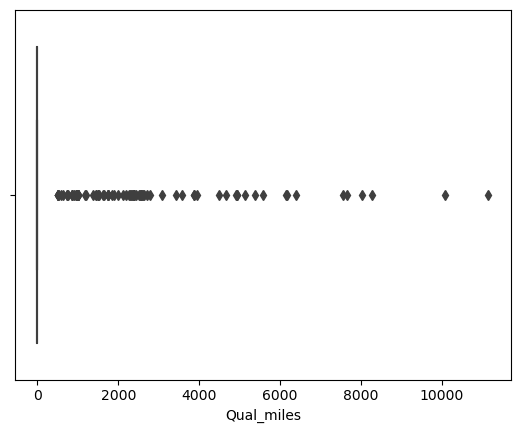

In [40]:
sns.boxplot(data5['Qual_miles'])

# Finalizing our Data 5 

In [41]:
data5.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0


In [42]:
# We know ID and award will not make much contribution while clustering so we will drop columns
data7 = data.drop(['ID#'],axis = 1)
data7

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


<AxesSubplot:>

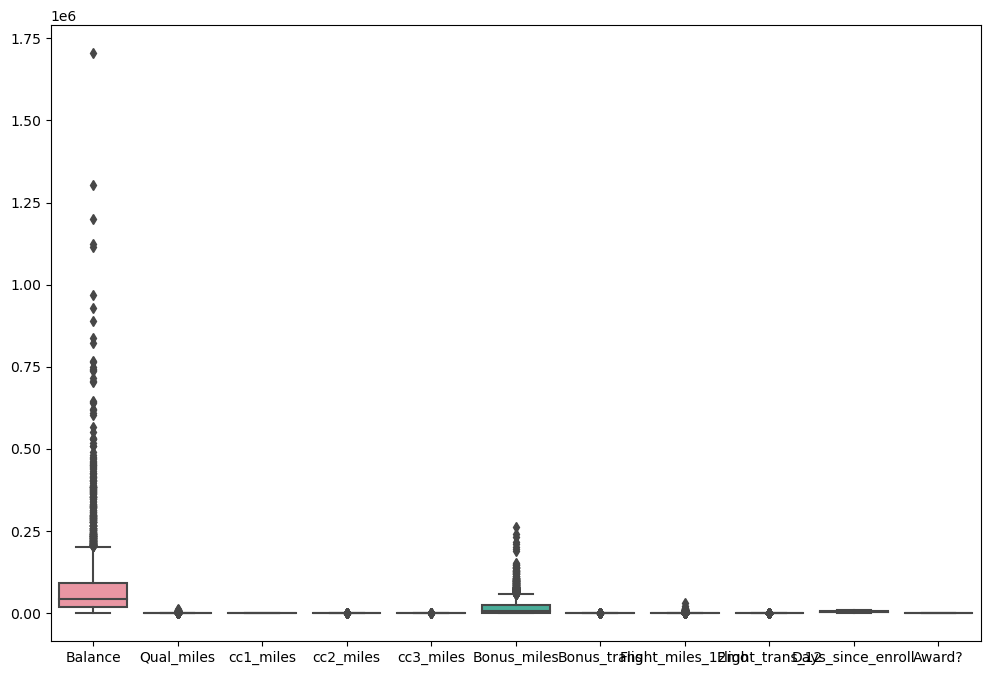

In [43]:
# Final boxplot graph with our data 
plt.figure(figsize=(12,8))
sns.boxplot(data= data7)

In [44]:
# Normalizing our data for Kmeans 
standard_scaler = StandardScaler()
dataset_norm = standard_scaler.fit_transform(data7)
dataset_norm.shape

(3999, 11)

# KMeans  Clustering


### Elbow Method

In [45]:
# Elbow method for determining the K value 
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(dataset_norm)
    wcss.append(kmeans.inertia_)


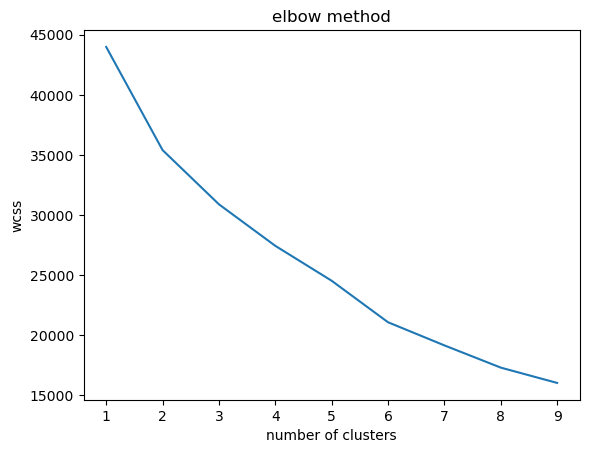

In [46]:
# plotting the elbow graph 
plt.plot(range(1,10),wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [47]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
# Generating the sample data from make_blobs

X, Y = make_blobs()

no_of_clusters = [2, 3, 4, 5, 6]

for n_clusters in no_of_clusters:

	cluster = KMeans(n_clusters = n_clusters)
	cluster_labels = cluster.fit_predict(X)

	# The silhouette_score gives the
	# average value for all the samples.
	silhouette_avg = silhouette_score(X, cluster_labels)

	print("For no of clusters =", n_clusters,
		" The average silhouette_score is :", silhouette_avg)


For no of clusters = 2  The average silhouette_score is : 0.7084280387072509
For no of clusters = 3  The average silhouette_score is : 0.6726042687753044
For no of clusters = 4  The average silhouette_score is : 0.6146473096886463
For no of clusters = 5  The average silhouette_score is : 0.5403836439340899
For no of clusters = 6  The average silhouette_score is : 0.4100399409344852


In [48]:
# We are looking for a generalized model for clustering we go with K value 4
clusters_new = KMeans(4, random_state= 100)
clusters_new.fit(dataset_norm)


KMeans(n_clusters=4, random_state=100)

In [49]:
clusters_new.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [51]:
# Assigning the cluster labels to our dataset 
data7['clusterid_new'] = clusters_new.labels_
data7.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [52]:
# Checking for the centroids and their values 
clusters_new.cluster_centers_

array([[ 1.19916278,  0.8413837 ,  0.07934291,  0.15576844, -0.06276658,
         0.61091878,  1.63802866,  3.57547132,  3.86140846,  0.28565421,
         0.91563614],
       [-0.29528914, -0.06063727, -0.60715417,  0.03196872, -0.06075696,
        -0.51485912, -0.48597537, -0.18456008, -0.19708015, -0.2046757 ,
        -0.34933968],
       [ 0.43233741,  0.01663491,  1.19185086, -0.08230398, -0.05473125,
         0.91524198,  0.74584113, -0.08010287, -0.09126548,  0.37052204,
         0.5795311 ],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [54]:
# Computing the aggregate mean by grouping them 
data7.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,194432.643750,794.981250,2.168750,1.037500,1.000000,31897.281250,27.331250,5465.837500,16.018750,4708.400000,0.812500
1,1,43847.088662,97.207532,1.223617,1.019223,1.000392,4712.054923,6.935269,201.665359,0.626128,3695.929384,0.201648
2,2,117164.969412,156.982745,3.700392,1.002353,1.001569,39246.061961,18.763922,347.909020,1.027451,4883.641569,0.650196
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


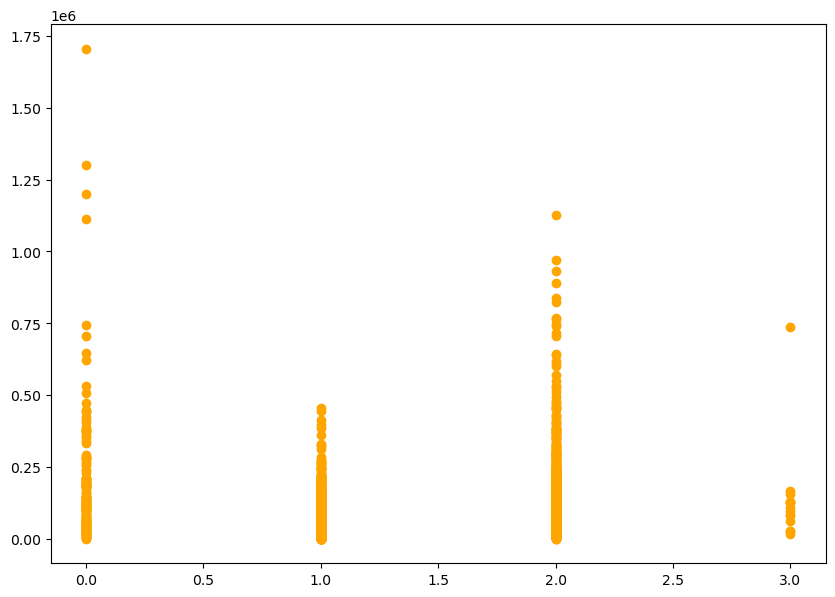

In [55]:
# Plotting the clusters 
plt.figure(figsize=(10,7))
plt.scatter(data7['clusterid_new'],data7['Balance'],c = 'orange')

In [56]:
# Total number of frquent flyers with frequent flyer credit card
data7[data7['clusterid_new']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0,1
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


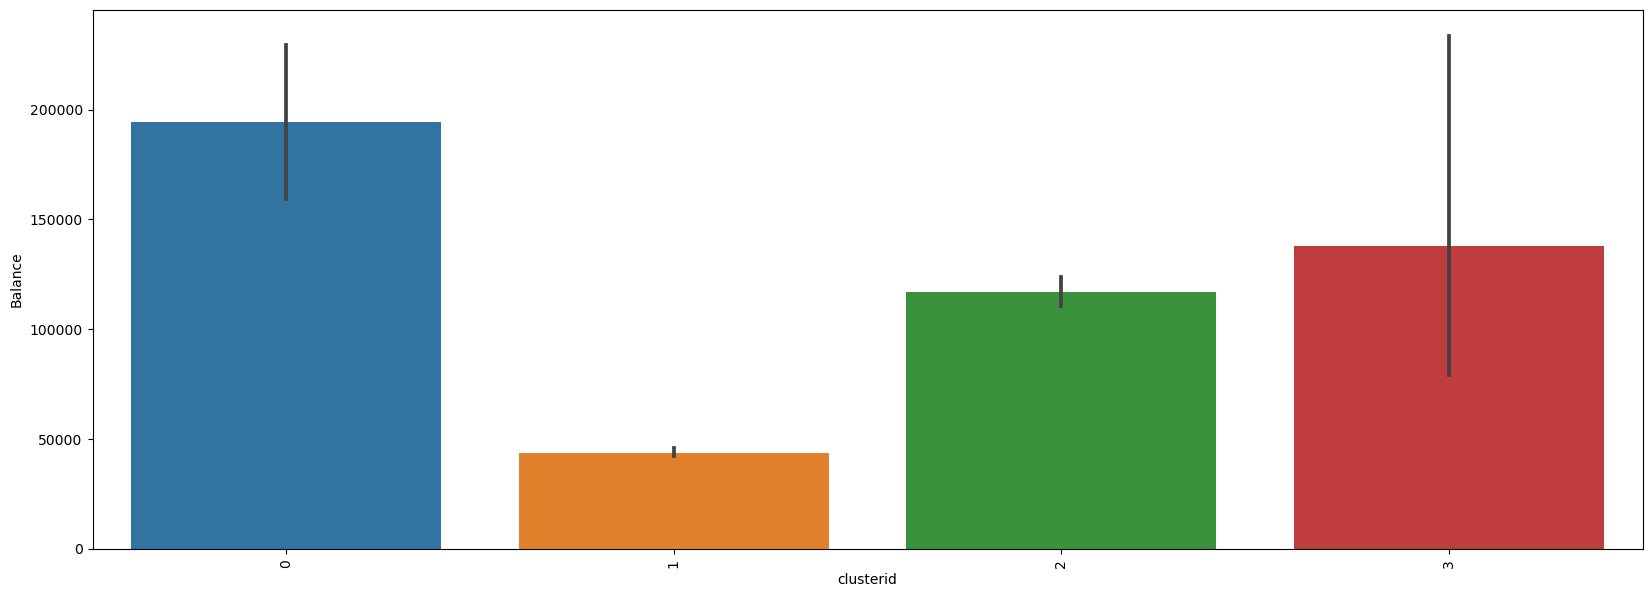

In [57]:
# Plotting with no of miles eligible for free flight and clusterid 
plt.figure(figsize=(20,7))
Balance = data7[['clusterid_new','Balance']].sort_values ('Balance',ascending = False)
ax =  sns.barplot(x = 'clusterid_new',y = 'Balance',data = Balance)
ax.set(xlabel = 'clusterid',ylabel = 'Balance')
plt.xticks(rotation = 90)
plt.show()



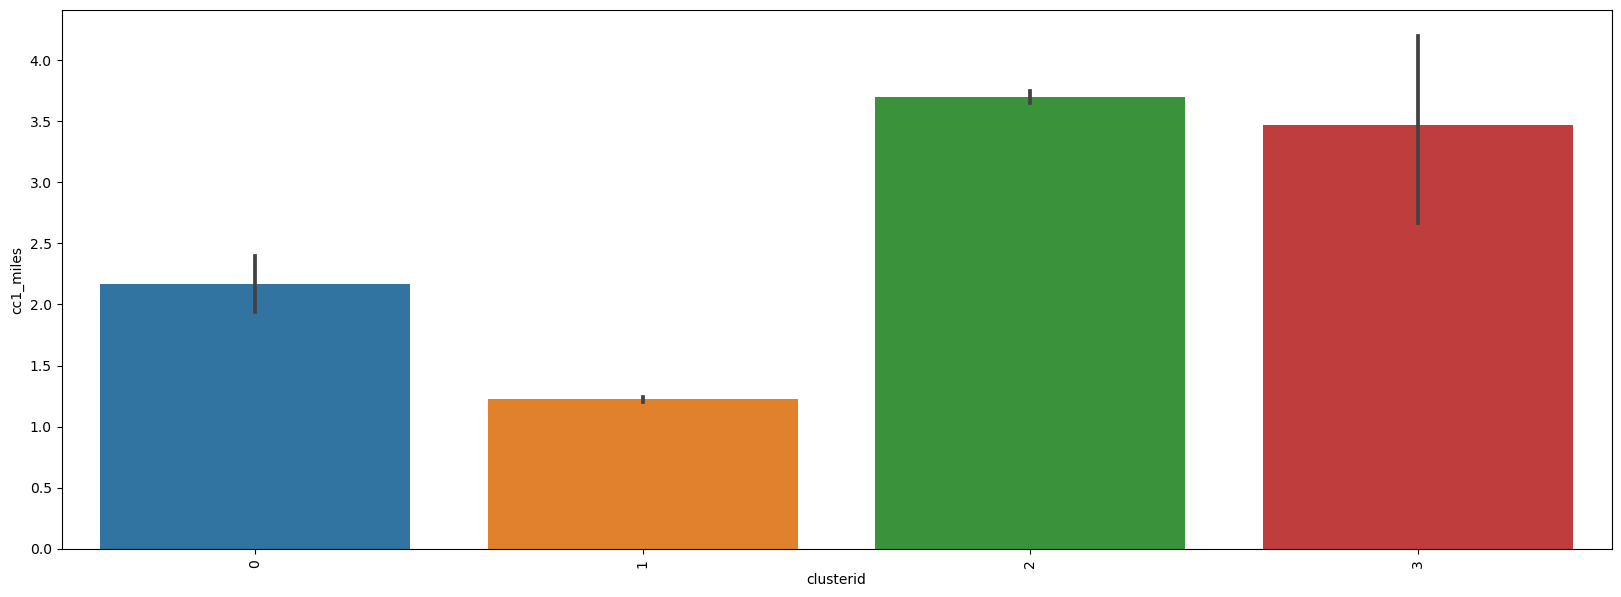

In [58]:
# Plotting with frequent flyer with cred card and clusterid 
plt.figure(figsize=(20,7))
Balance = data7[['clusterid_new','cc1_miles']].sort_values ('cc1_miles',ascending = False)
ax =  sns.barplot(x = 'clusterid_new',y = 'cc1_miles',data = Balance)
ax.set(xlabel = 'clusterid',ylabel = 'cc1_miles')
plt.xticks(rotation = 90)
plt.show()



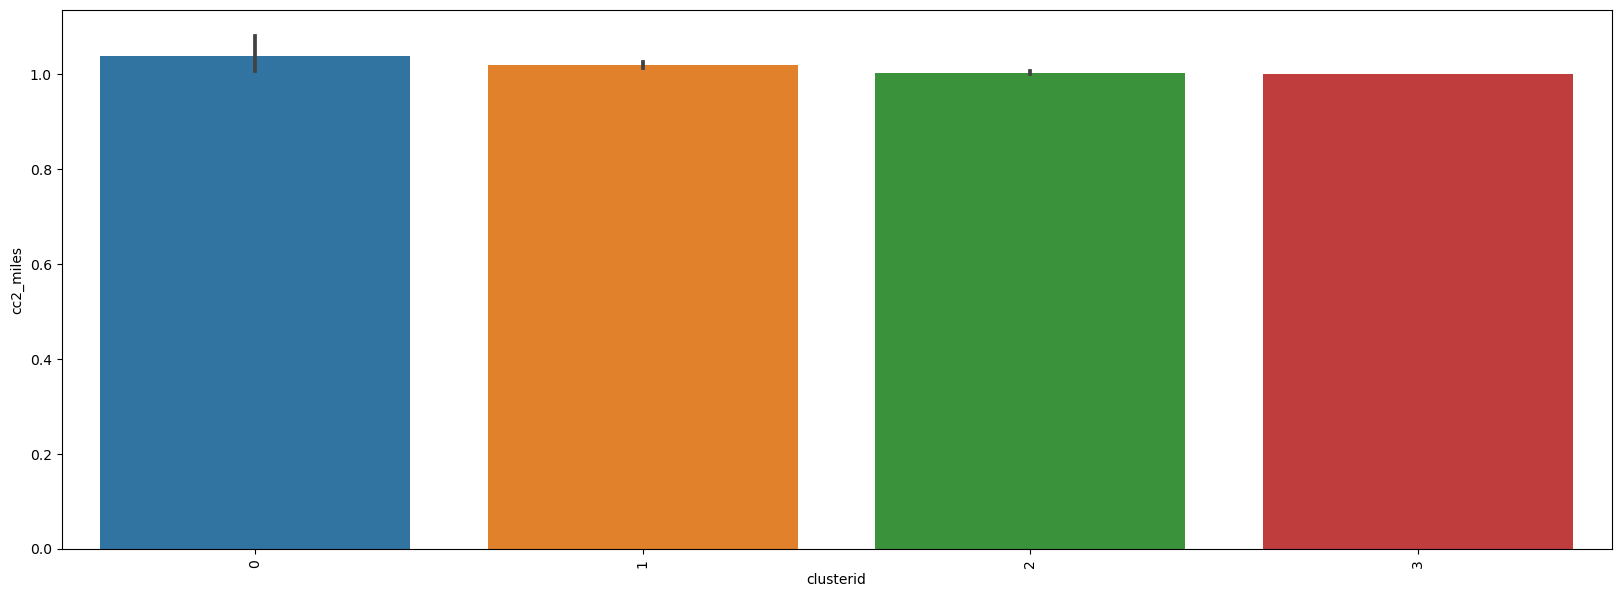

In [59]:
# Plotting with frequent flyer with rewards earned by cred card and clusterid 
plt.figure(figsize=(20,7))
Balance = data7[['clusterid_new','cc2_miles']].sort_values ('cc2_miles',ascending = False)
ax =  sns.barplot(x = 'clusterid_new',y = 'cc2_miles',data = Balance)
ax.set(xlabel = 'clusterid',ylabel = 'cc2_miles')
plt.xticks(rotation = 90)
plt.show()



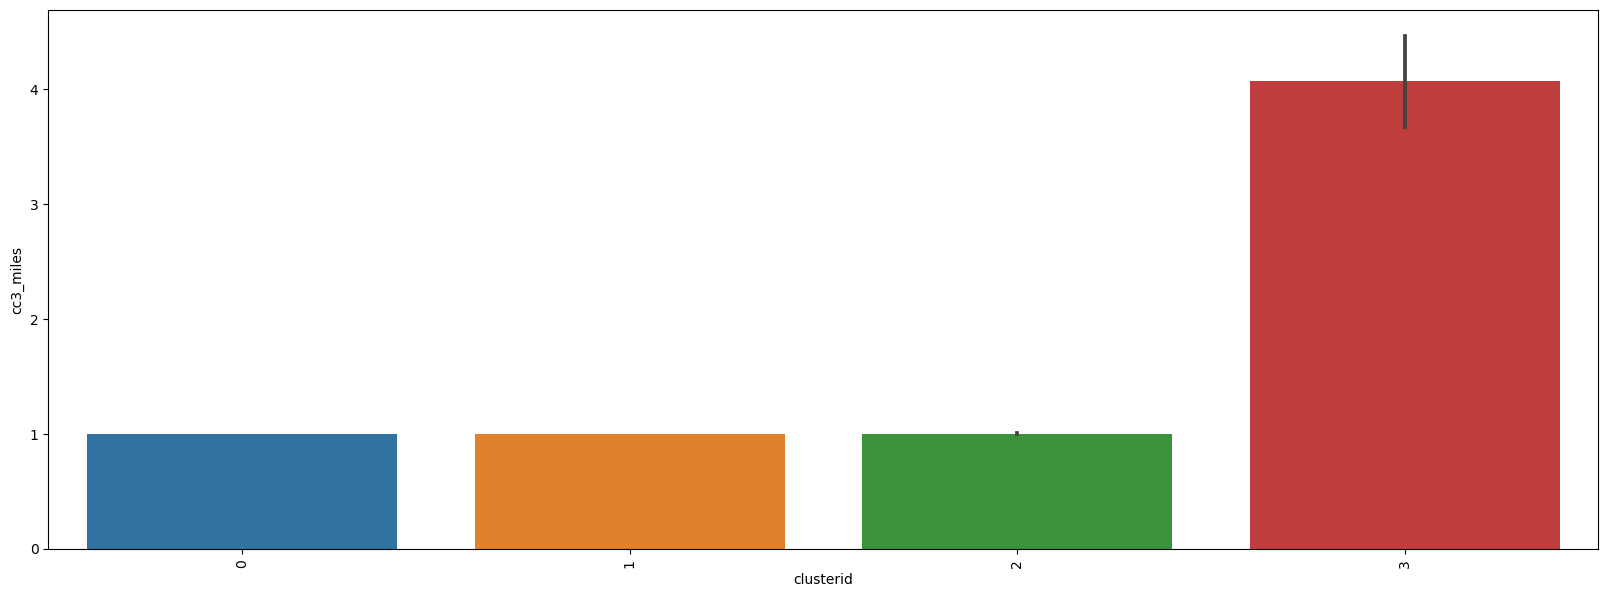

In [60]:
# Plotting with  rewards earned by small buisness cred card and clusterid 
plt.figure(figsize=(20,7))
Balance = data7[['clusterid_new','cc3_miles']].sort_values ('cc3_miles',ascending = False)
ax =  sns.barplot(x = 'clusterid_new',y = 'cc3_miles',data = Balance)
ax.set(xlabel = 'clusterid',ylabel = 'cc3_miles')
plt.xticks(rotation = 90)
plt.show()



In [ ]:
#  KMeans is sensitive to outliers and has much impact after the outliers being treated .

# Hierarchial Clustering 


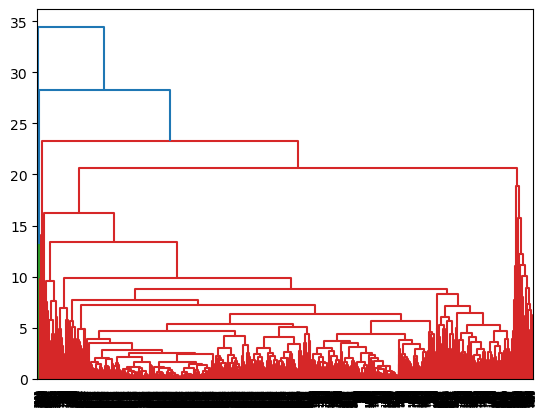

In [61]:
# Plotting dendrogram for dataset
dng = sch.dendrogram(sch.linkage(dataset_norm, method = 'complete'))

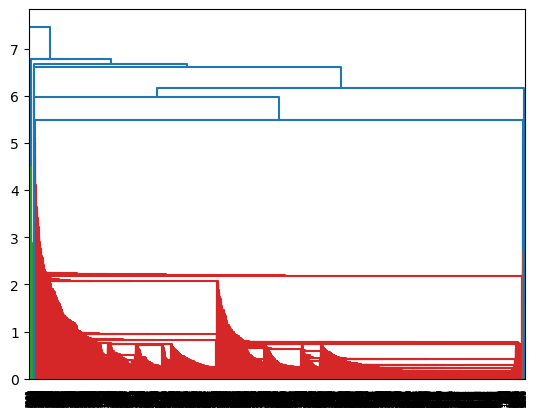

In [62]:
# Plotting dendrogram for dataset
dng = sch.dendrogram(sch.linkage(dataset_norm, method = 'single'))

In [63]:
# Creating the clusters
hc = AgglomerativeClustering(n_clusters = 4 ,affinity = 'euclidean',linkage = 'complete')

In [64]:
# Prediction
hc.fit(dataset_norm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [65]:
y_hc = hc.fit_predict(dataset_norm)

In [66]:
clusters = pd.DataFrame(y_hc,columns = ['clusters'])
clusters.head()

,clusters
0,0
1,0
2,0
3,0
4,0


In [67]:
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
data7['h_clusterid'] = y_hc

In [69]:
data7.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0


### Concluding the Heirachial Clustering Model


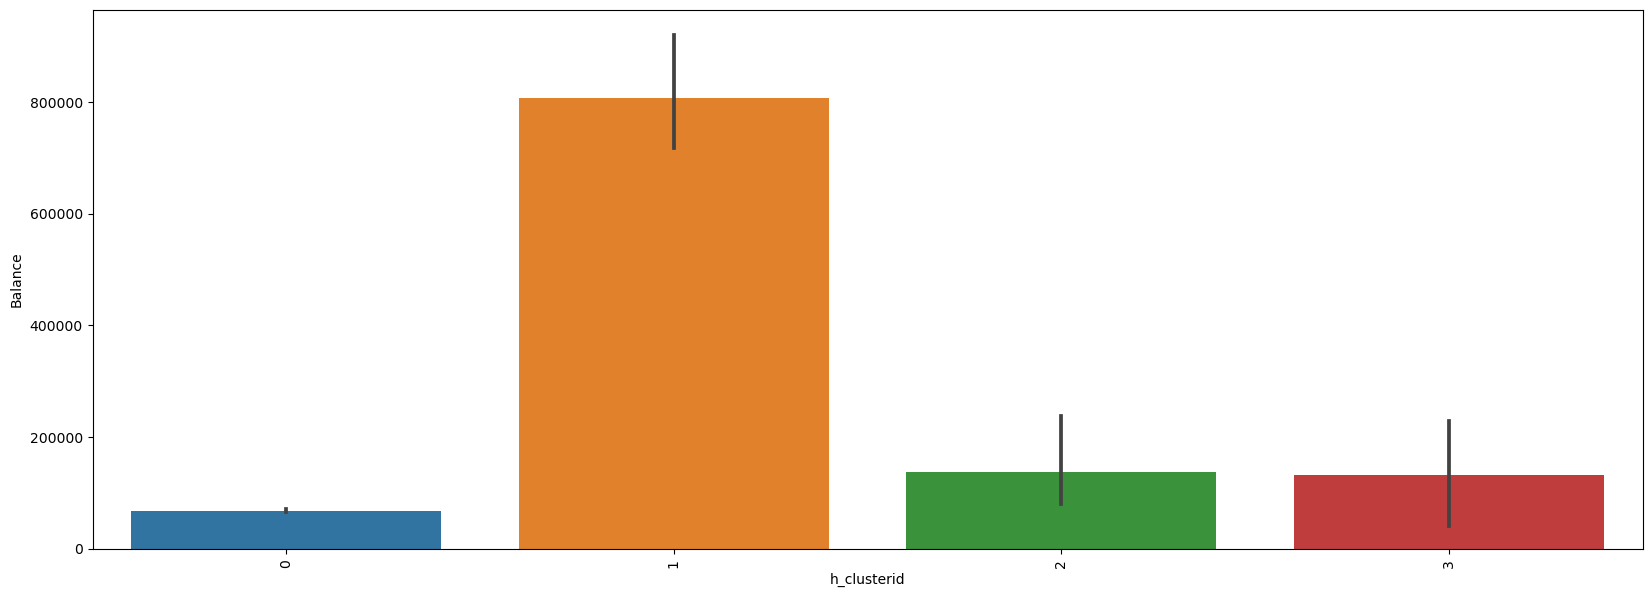

In [70]:
# plotting with no of miles eligible for free flight and agglomerative clusterid 
plt.figure(figsize=(20,7))
Balance = data7[['h_clusterid','Balance']].sort_values ('Balance',ascending = False)
ax =  sns.barplot(x = 'h_clusterid',y = 'Balance',data = Balance)
ax.set(xlabel = 'h_clusterid',ylabel = 'Balance')
plt.xticks(rotation = 90)
plt.show()



In [71]:
print("cluster labels for each point:",hc.labels_)
print("no of leaves in hierarchial tree:",hc.n_leaves_)
print("the estimated no of connected components in the graph:",hc.n_connected_components_)
print("the children on each non-leaf node:",hc.children_)
print("clustering score:",(silhouette_score(dataset_norm,hc.labels_)*100).round(3))


cluster labels for each point: [0 0 0 ... 0 0 0]
no of leaves in hierarchial tree: 3999
the estimated no of connected components in the graph: 1
the children on each non-leaf node: [[3370 3876]
 [2678 2679]
 [3491 3998]
 ...
 [7989 7993]
 [7986 7994]
 [7987 7995]]
clustering score: 59.857


### We are geting higher accuracy in hierarchial clustering compared to KMeans Clustering.

# DBSCAN

In [72]:
data8 = data7.drop(['clusterid_new','h_clusterid'],axis = 1)

In [126]:
scaled = StandardScaler()
X = scaled.fit_transform(dataset_norm)

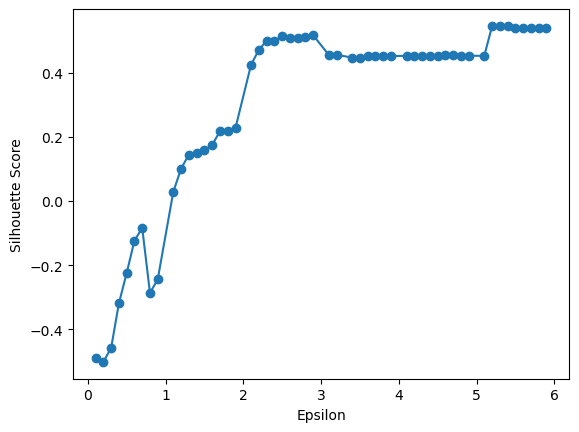

In [127]:
from sklearn.metrics import silhouette_score

eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.1,2.2,2.3,2.4,2.5,2.6
             ,2.7,2.8,2.9,3.1,3.2,3.4,3.5,3.6,3.7,3.8,3.9,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.1,5.2
             ,5.3,5.4,5.5,5.6,5.7,5.8,5.9]
scores = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=2)
    dbscan.fit(X)
    labels = dbscan.labels_
    score = silhouette_score(X, labels)
    scores.append(score)

plt.plot(eps_values, scores, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.show()


In [128]:
dataset_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [129]:
dbscan = DBSCAN(eps = 6, min_samples=22)
dbscan.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [130]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [131]:
# Putting our labels into dataframe and wherever we have -1 it indicates we have noisy samples
cl = pd.DataFrame(dbscan.labels_,columns = ['clusterid'])
cl

,clusterid
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [132]:
data8['cl'] = dbscan.labels_
data8

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cl
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [133]:
# total number of noisy samples 
data8[data8['cl']== -1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cl
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,-1
198,8669,0,1,3,1,11397,16,0,0,7486,1,-1
275,1704838,0,1,1,1,17108,32,4823,23,7283,1,-1
381,167670,0,1,3,1,15907,13,0,0,6994,0,-1
384,28193,0,5,1,4,103456,32,0,0,6980,1,-1
850,25629,0,4,1,5,107308,36,600,2,5966,1,-1
904,15835,0,2,1,5,112171,16,0,0,5825,1,-1
940,44824,0,1,3,1,21107,19,2000,4,5916,1,-1
1244,166465,0,4,1,4,98717,30,0,0,5531,0,-1
1270,16103,0,1,3,1,10819,13,0,0,5427,0,-1


In [134]:
data8.groupby('cl').agg(['mean']).reset_index()

,cl,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,147535.218750,111.562500,2.000000,1.9375,2.250000,54543.406250,28.406250,3176.656250,9.062500,4154.000000,0.562500
1,0,72970.896167,145.403402,2.066007,1.0000,1.002285,16880.260218,11.428535,437.534146,1.308962,4119.741051,0.368621
2,1,77793.642857,0.000000,1.214286,2.0000,1.000000,11625.214286,16.785714,523.678571,1.678571,3911.821429,0.392857


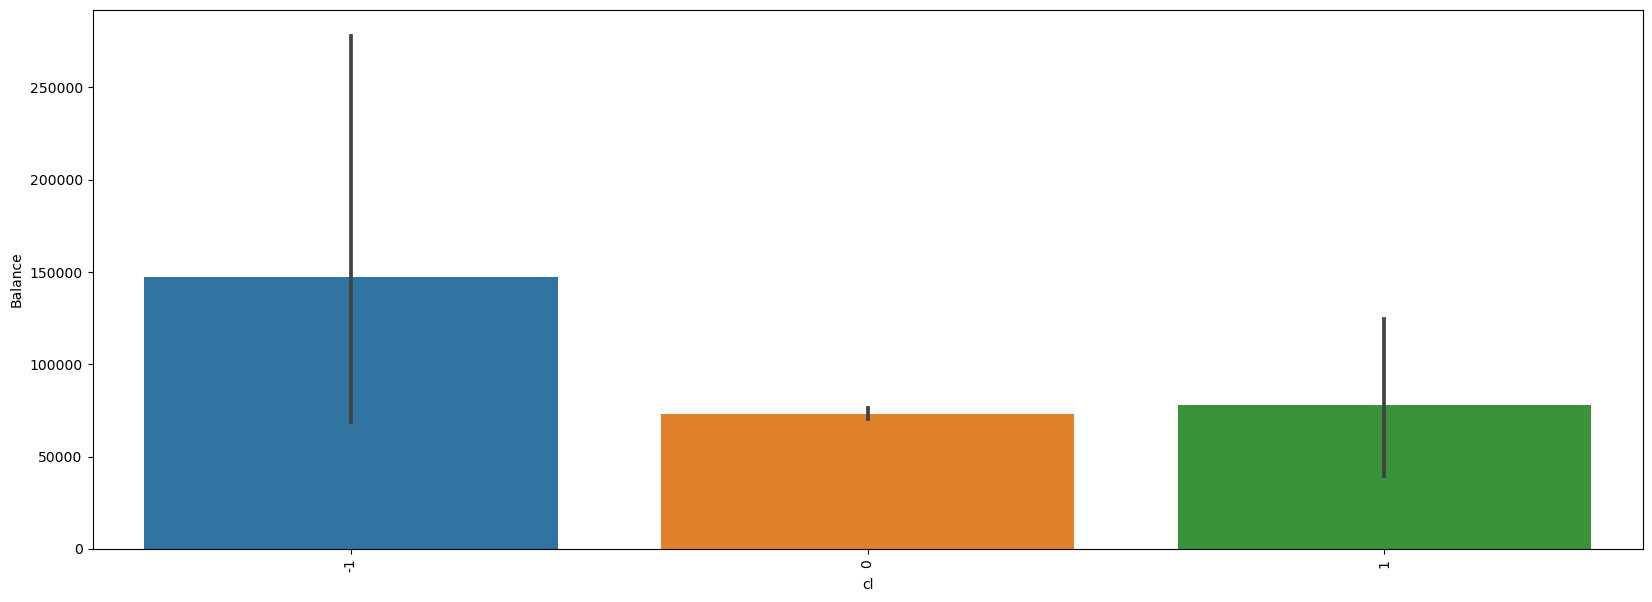

In [135]:
#plotting with frequent flyers and non frequent flyers
plt.figure(figsize=(20,7))
Balance = data8[['cl','Balance']].sort_values ('Balance',ascending = False)
ax =  sns.barplot(x = 'cl',y = 'Balance',data = Balance)
ax.set(xlabel = 'cl',ylabel = 'Balance')
plt.xticks(rotation = 90)
plt.show()



#  Conclusion considering kmeans as it is our generalised model

### 1) Cluster 1 shows us that are newer passengers and have much lower number of miles travelled compared to cluster 2, and lowest number of miles with frequent flyer card .

### 2) Cluster 2 shows us that usage of flights have been used frequently by the frequent flyer card and also have earned more number of miles .this cluster also shows us that the passengers are from upper class.

### 3) Cluster 3 shows us that rewards earned on credit cards higher but usage of flights have been less and even engagement in the program is lesser compared to other clusters.

### 4) Cluster 4 shows that they are frequent flyers but compared to cluster 1 the usage of flights is more in cluster 4 , this shows us that  domestic flights are used often than topflights.
